In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

loading the dataset 

In [3]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


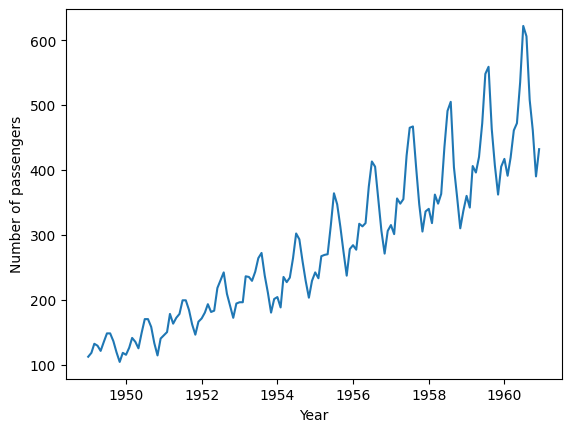

In [4]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.show()


In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing
model=SimpleExpSmoothing(data)
model_single_fit=model.fit()

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


making predictions 

In [6]:
forecast_single=model_single_fit.forecast(6)
print(forecast_single)

1961-01-01    431.999999
1961-02-01    431.999999
1961-03-01    431.999999
1961-04-01    431.999999
1961-05-01    431.999999
1961-06-01    431.999999
Freq: MS, dtype: float64


visualizing single exponential smoothing 

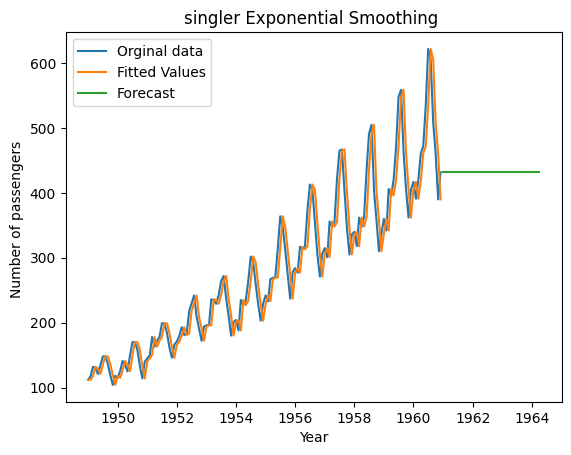

In [7]:
forecast_single=model_single_fit.forecast(40)
plt.plot(data,label='Orginal data')
plt.plot(model_single_fit.fittedvalues,label='Fitted Values')
plt.plot(forecast_single,label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of passengers ')
plt.title('singler Exponential Smoothing ')
plt.legend()
plt.show()


appling double exponenetial smoothing 

In [8]:
from statsmodels.tsa.api import Holt 
model_double=Holt(data)
model_double_fit=model_double.fit()

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

1961-01-01    436.564624
1961-02-01    441.129249
1961-03-01    445.693873
1961-04-01    450.258498
1961-05-01    454.823122
1961-06-01    459.387747
Freq: MS, dtype: float64


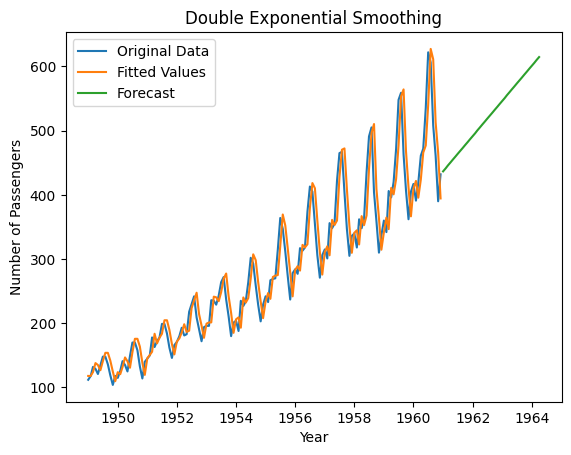

In [9]:
forecast_double = model_double_fit.forecast(40)
plt.plot(data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

applying hot winter seasonal smoothing 

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing
model_triple=ExponentialSmoothing(
       data,
       seasonal_periods=12,
       trend='add',
       seasonal='add'
)
model_triple_fit=model_triple.fit()



C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

1961-01-01    451.577699
1961-02-01    427.258492
1961-03-01    464.700105
1961-04-01    500.104435
1961-05-01    508.662121
1961-06-01    567.715376
Freq: MS, dtype: float64


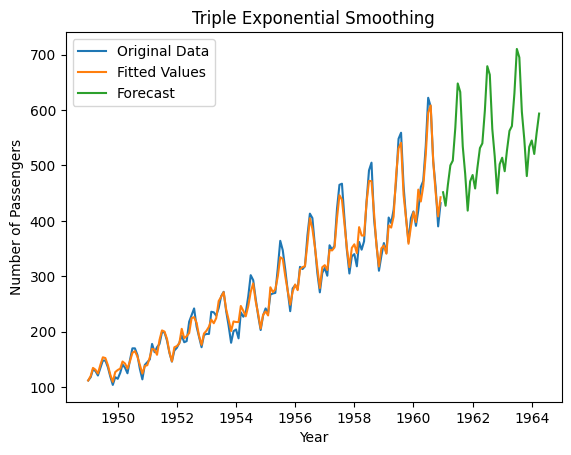

In [12]:
forecast_triple = model_triple_fit.forecast(40)
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()